# **Phishing URL detection: regression synthetic dataset**

**RQ1:** What characteristics provide the greatest discriminatory information for identifying phishing sites compared to legitimate ones?  

**RQ2:** Do synthetic data generated by Large Language Models preserve the same statistical properties as real data?

**RQ3:** What are the main differences between synthetic data generated by LLMs and real data in regression and clustering contexts?

**RQ4:** Can the features generated by LLMs be mapped to known statistical distributions?

<br>

**Author:** Raffaele Aurucci

## **Reading filtered dataset**

In [1]:
download.file("https://drive.google.com/uc?id=1Sd9obB-lHiCWhDgXsmR6rtXpeupCnWYX&export=download", "Phishing_URL_Synthetic_Dataset_3_Filtered.csv")

In [2]:
df <- read.csv('Phishing_URL_Synthetic_Dataset_3_Filtered.csv', sep = ",")

In [3]:
str(df)

'data.frame':	10124 obs. of  21 variables:
 $ URLLength            : int  45 60 28 75 90 55 42 100 39 62 ...
 $ DomainLength         : int  25 30 18 40 50 35 22 60 27 33 ...
 $ TLDEncoding          : num  0.32 0.2 0.4 0.1 0.25 0.35 0.3 0.15 0.38 0.27 ...
 $ NoOfLettersInURL     : int  30 35 12 45 40 28 20 50 15 32 ...
 $ NoOfDigitsInURL      : int  4 5 2 10 6 4 2 8 3 5 ...
 $ NoOfSpecialCharsInURL: int  5 4 1 6 2 3 2 8 2 5 ...
 $ IsHTTPS              : int  0 0 0 0 0 0 0 0 1 0 ...
 $ LineOfCode           : int  300 210 100 400 150 320 250 500 80 90 ...
 $ LargestLineLength    : int  2000 1800 1500 3000 2500 2200 1000 4500 900 2000 ...
 $ HasTitle             : int  0 0 1 0 1 0 0 0 0 0 ...
 $ NoOfReference        : int  5 2 8 0 3 4 2 10 1 0 ...
 $ DomainTitleMatchScore: num  10.5 0 15 0 5.5 20 0 25.4 10 0 ...
 $ URLTitleMatchScore   : num  25.4 0 22 0 10.2 35.7 0 30.1 12 0 ...
 $ HasFavicon           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Robots               : int  0 0 0 0 0 0 0 0 0 0 ...
 

## **Correlation between features**

In [ ]:
if (!require(ggplot2))
    install.packages("ggplot2")

if (!require(corrplot))
    install.packages("corrplot")

library(ggplot2)
library(corrplot)

### Pearson's Correlation Matrix

In [5]:
corr_pearson <- cor(df, method = "pearson")

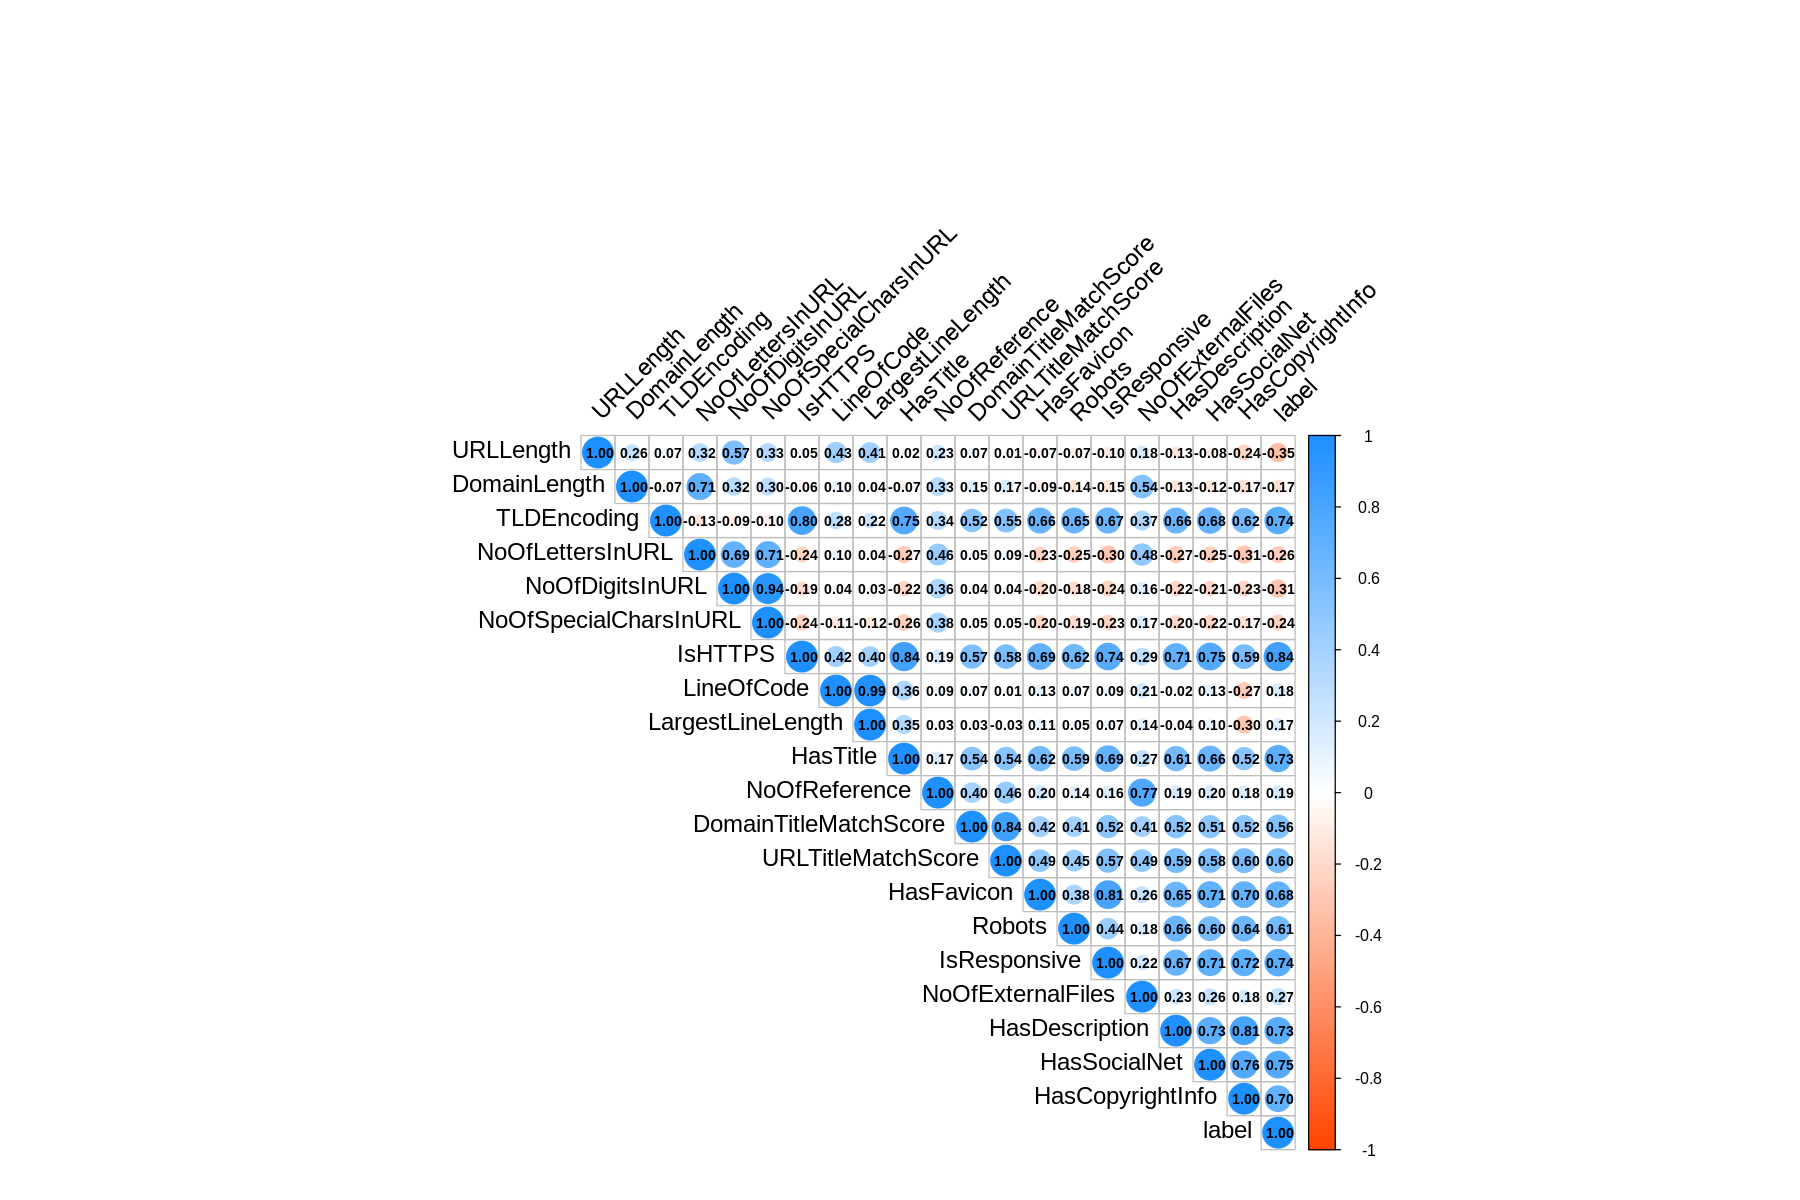

In [38]:
# corrplot dimension
options(repr.plot.width = 15, repr.plot.height = 10)

corrplot(corr_pearson,
         method = "circle",
         type = "upper",
         col = colorRampPalette(c("orangered", "white", "dodgerblue"))(200),
         cex.main = 1.75,
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 0.7,
         cl.pos = "r",
         tl.cex = 1.2,
)

### Spearman's Correlation Matrix

In [11]:
corr_spearman <- cor(df, method = "spearman")

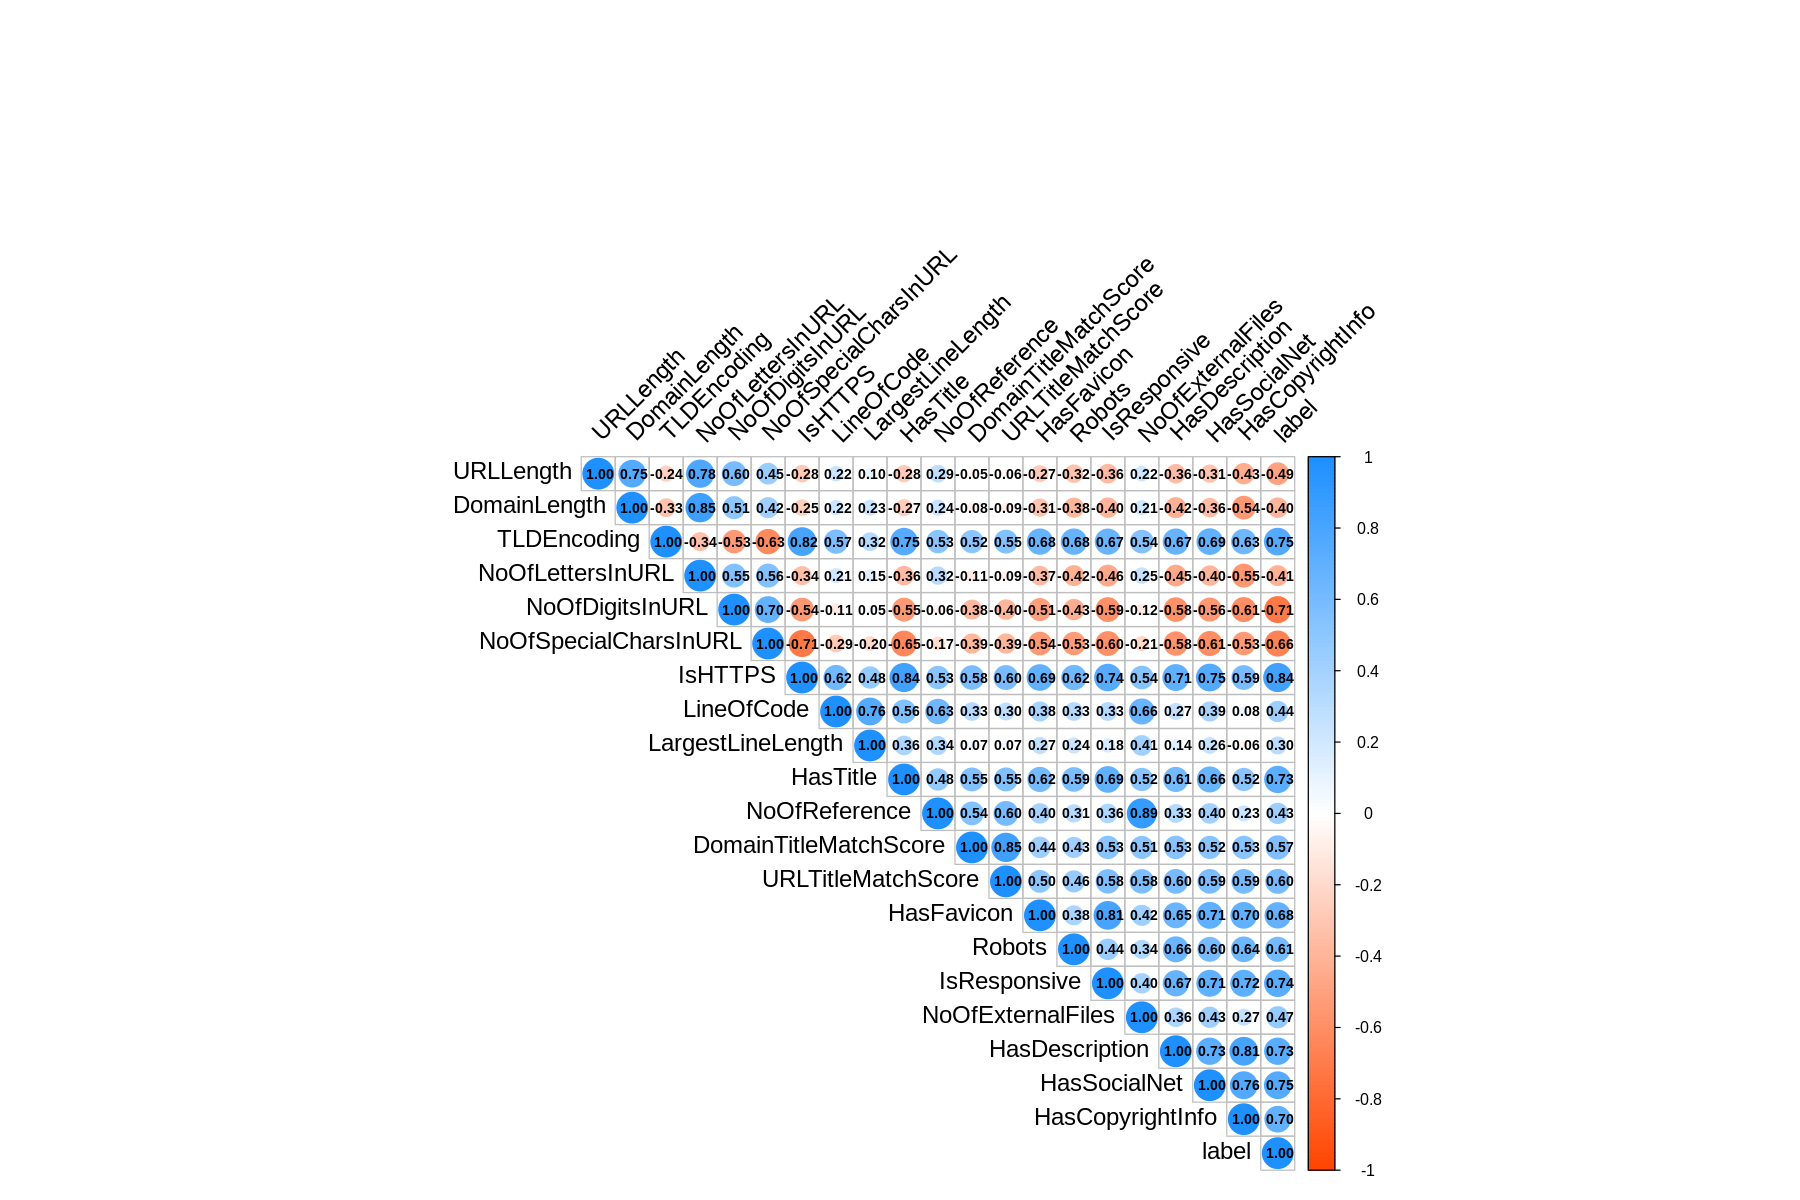

In [33]:
# corrplot dimension
options(repr.plot.width = 15, repr.plot.height = 10)

corrplot(corr_spearman,
         method = "circle",
         type = "upper",
         col = colorRampPalette(c("orangered", "white", "dodgerblue"))(200),
         mar = c(0, 0, 1.75, 0),
         cex.main = 1.75,
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 0.7,
         cl.pos = "r",
         tl.cex = 1.2,
)

### **Z-score normalization**

The Z-score normalization (or standardization) is used to transform data so that each variable has a mean of 0 and a standard deviation of 1. This is important because it ensures that all variables are on the same scale and making the data comparable, especially when using algorithms that are sensitive to the scale, such as linear regression, K-nearest neighbors, etc.  


$$
Z = \frac{X - \mu}{\sigma}
$$

In [39]:
# Exclude binary features to the scaling
exclude_columns <- c(7, 10, 14, 15, 16, 18, 19, 20, 21)

df_to_scale <- df[, -exclude_columns]

df_scaled <- scale(df_to_scale)

# Combined binary and continuous fratures
df_normalized <- cbind(df_scaled, df[, exclude_columns])

# Converting in data frame
df_normalized <- as.data.frame(df_normalized)

## **Simple Linear Regression**

### URLLength ~ NoOfDegitsInURL

In [41]:
model <- lm(df_normalized$URLLength ~ df_normalized$NoOfDigitsInURL)

# r.square
summary(model)


Call:
lm(formula = df_normalized$URLLength ~ df_normalized$NoOfDigitsInURL)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5209 -0.2884 -0.2543 -0.1146  3.4961 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.586e-16  8.198e-03    0.00        1    
df_normalized$NoOfDigitsInURL 5.653e-01  8.199e-03   68.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8249 on 10122 degrees of freedom
Multiple R-squared:  0.3196,	Adjusted R-squared:  0.3195 
F-statistic:  4755 on 1 and 10122 DF,  p-value: < 2.2e-16


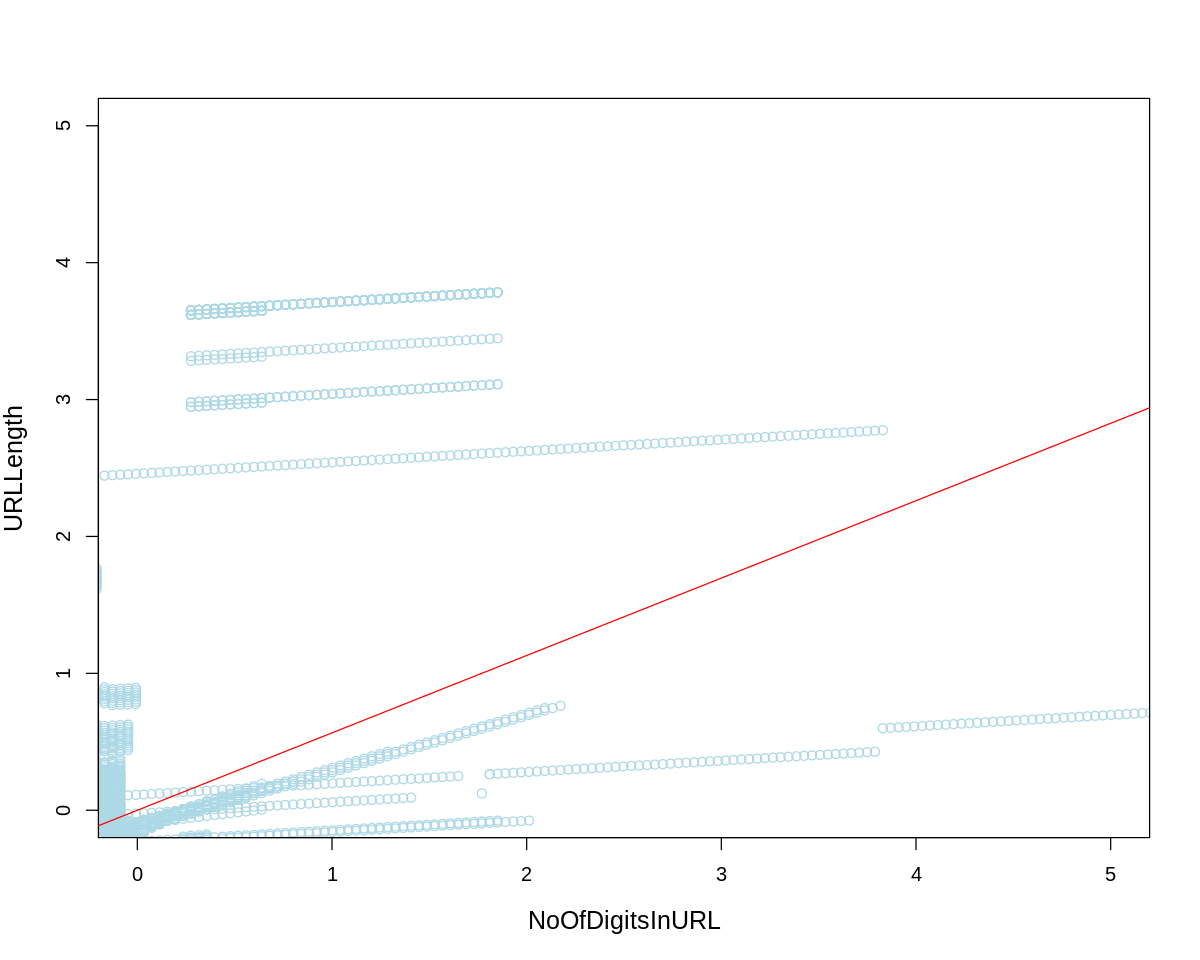

In [44]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(df_normalized$NoOfDigitsInURL, df_normalized$URLLength,
     xlab = "NoOfDigitsInURL", ylab = "URLLength",
     col = 'lightblue',
     xlim = c(0, 5), ylim = c(0, 5),
     cex.lab = 1.25)
abline(lm(df_normalized$URLLength ~ df_normalized$NoOfDigitsInURL), col = "red")

### URLTitleMatchScore ~ DomainTitleMatchScore

In [45]:
model <- lm(df_normalized$URLTitleMatchScore ~ df_normalized$DomainTitleMatchScore)

# r.square
summary(model)


Call:
lm(formula = df_normalized$URLTitleMatchScore ~ df_normalized$DomainTitleMatchScore)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.11992 -0.18883 -0.00129  0.25599  2.66827 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         4.715e-17  5.361e-03     0.0        1    
df_normalized$DomainTitleMatchScore 8.421e-01  5.361e-03   157.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5394 on 10122 degrees of freedom
Multiple R-squared:  0.709,	Adjusted R-squared:  0.709 
F-statistic: 2.467e+04 on 1 and 10122 DF,  p-value: < 2.2e-16


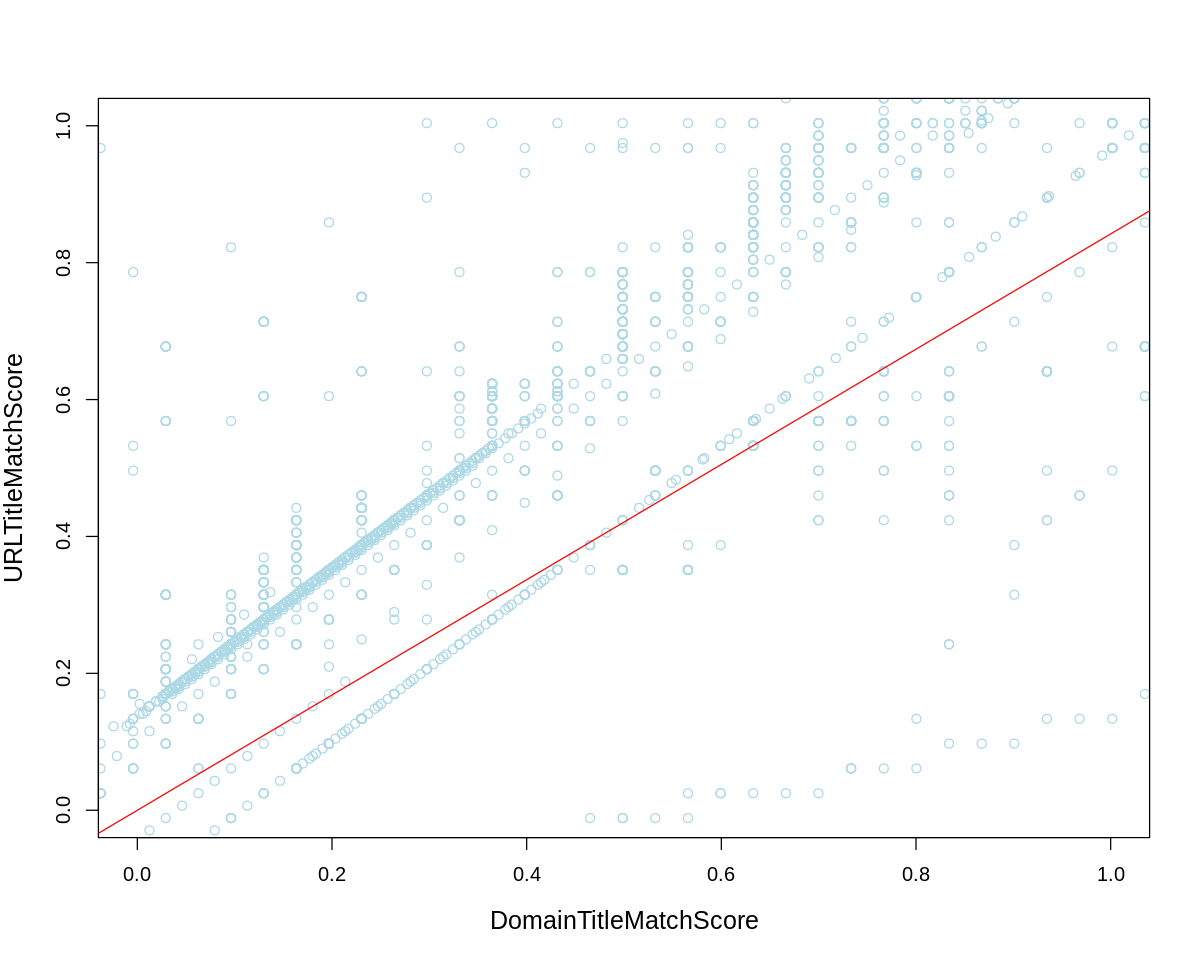

In [46]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(df_normalized$DomainTitleMatchScore, df_normalized$URLTitleMatchScore,
     xlab = "DomainTitleMatchScore", ylab = "URLTitleMatchScore",
     col = 'lightblue',
     xlim = c(0, 1), ylim = c(0, 1),
     cex.lab = 1.25)
abline(lm(df_normalized$URLTitleMatchScore ~ df_normalized$DomainTitleMatchScore), col = "red")

### LineOfCode ~ NoOfExternalFiles

In [47]:
model <- lm(df_normalized$LineOfCode ~ df_normalized$NoOfExternalFiles)

# r.square
summary(model)


Call:
lm(formula = df_normalized$LineOfCode ~ df_normalized$NoOfExternalFiles)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6724 -0.4716 -0.4158 -0.1715  3.3144 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     5.557e-16  9.722e-03    0.00        1    
df_normalized$NoOfExternalFiles 2.076e-01  9.723e-03   21.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9783 on 10122 degrees of freedom
Multiple R-squared:  0.04311,	Adjusted R-squared:  0.04301 
F-statistic:   456 on 1 and 10122 DF,  p-value: < 2.2e-16


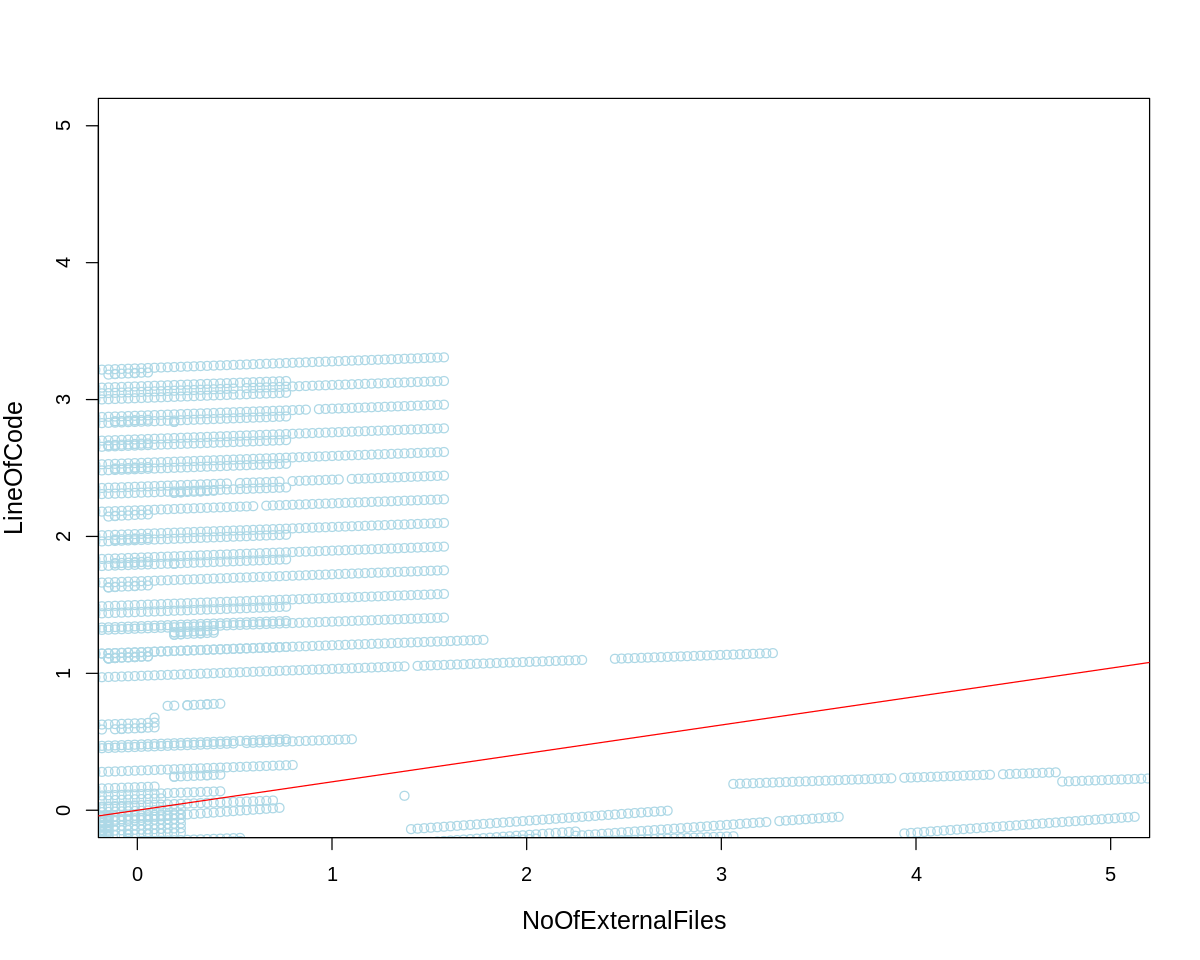

In [53]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(df_normalized$NoOfExternalFiles, df_normalized$LineOfCode,
     xlab = "NoOfExternalFiles", ylab = "LineOfCode",
     col = 'lightblue',
     xlim = c(0, 5), ylim = c(0, 5),
     cex.lab = 1.25)
abline(lm(df_normalized$LineOfCode ~ df_normalized$NoOfExternalFiles), col = "red")

## **Multiple Linear Regression**

### URLLength ~ [all features - label]

In [54]:
model <- lm(URLLength ~ . - label, data = df_normalized)

# r.square
summary(model)


Call:
lm(formula = URLLength ~ . - label, data = df_normalized)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8990 -0.1464 -0.0338  0.0803  2.4945 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.2080540  0.0164981  12.611  < 2e-16 ***
DomainLength           0.1020893  0.0084329  12.106  < 2e-16 ***
TLDEncoding            0.0770392  0.0110712   6.959 3.65e-12 ***
NoOfLettersInURL      -0.2582800  0.0122976 -21.003  < 2e-16 ***
NoOfDigitsInURL        2.2256317  0.0169885 131.008  < 2e-16 ***
NoOfSpecialCharsInURL -1.6637567  0.0183930 -90.456  < 2e-16 ***
LineOfCode             1.0710079  0.0380577  28.142  < 2e-16 ***
LargestLineLength     -0.9135680  0.0389767 -23.439  < 2e-16 ***
NoOfReference         -0.0003347  0.0090263  -0.037  0.97042    
DomainTitleMatchScore  0.1336232  0.0093516  14.289  < 2e-16 ***
URLTitleMatchScore    -0.1081663  0.0104685 -10.333  < 2e-16 ***
NoOfExternalFiles      0.0983246  0.0102183   

#### Standard residuals compared to estimated values

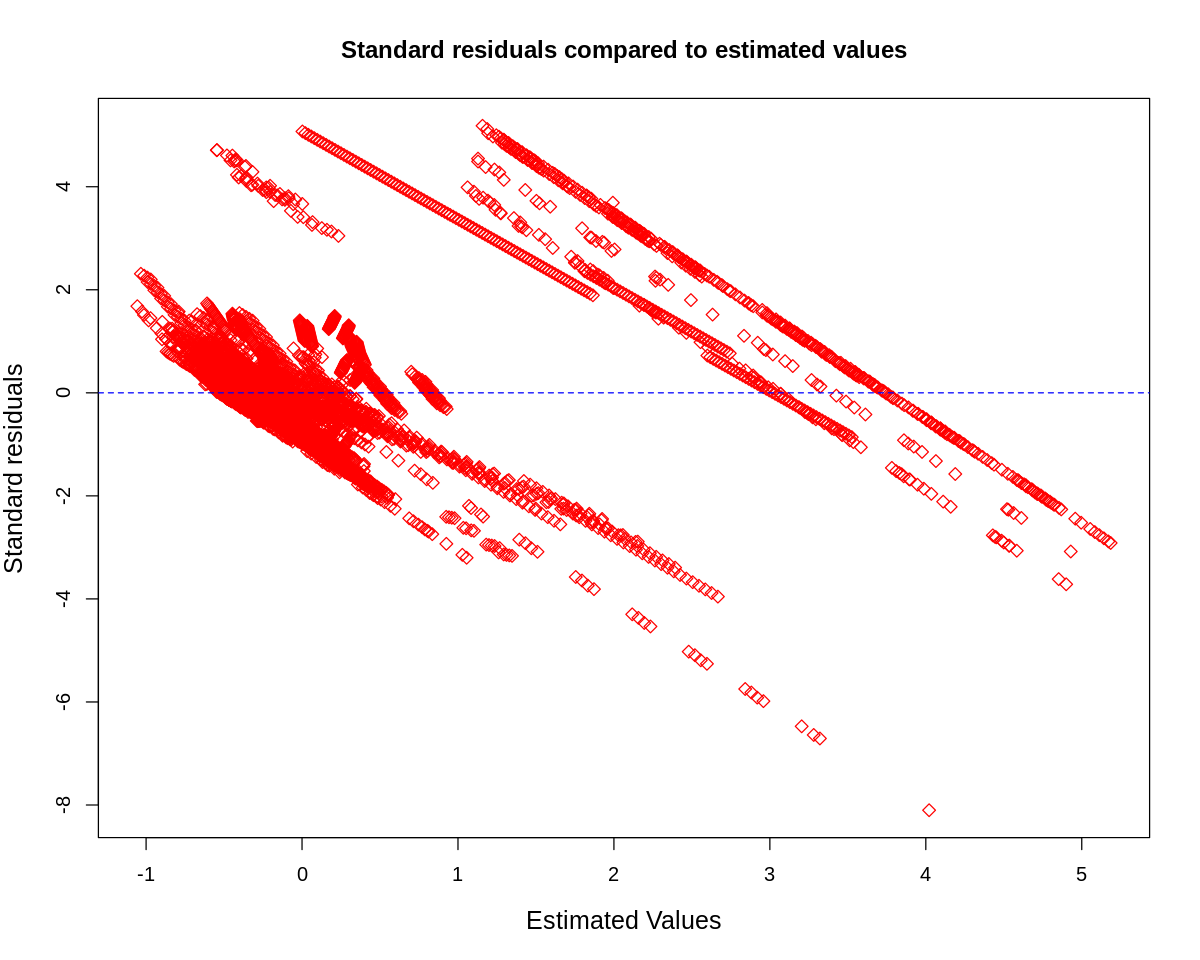

In [55]:
# Vector of estimated values
estimates <- fitted(model)

# Vector of residuals
residuals <- resid(model)

# Vector of standard residuals
standard_residuals <- residuals/sd(residuals)

# Standard residuals respect estimated values
plot(estimates, standard_residuals,
     main="Standard residuals compared to estimated values",
     xlab="Estimated Values", ylab="Standard residuals", pch=5, col="red",
     cex.lab = 1.25)
abline(h=0, col="blue", lty=2)

### URLTitleMatchScore ~ [all features - label]

In [56]:
model <- lm(URLTitleMatchScore ~ . - label, data = df_normalized)

# r.square
summary(model)


Call:
lm(formula = URLTitleMatchScore ~ . - label, data = df_normalized)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.86311 -0.17407 -0.02487  0.14670  2.71011 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.333930   0.015363 -21.735  < 2e-16 ***
URLLength             -0.096664   0.009355 -10.333  < 2e-16 ***
DomainLength          -0.004742   0.008029  -0.591 0.554808    
TLDEncoding           -0.012771   0.010490  -1.217 0.223462    
NoOfLettersInURL       0.125535   0.011811  10.629  < 2e-16 ***
NoOfDigitsInURL        0.333027   0.026174  12.724  < 2e-16 ***
NoOfSpecialCharsInURL -0.325982   0.023165 -14.072  < 2e-16 ***
LineOfCode            -0.266070   0.037267  -7.140 1.00e-12 ***
LargestLineLength      0.165093   0.037799   4.368 1.27e-05 ***
NoOfReference          0.063371   0.008510   7.447 1.03e-13 ***
DomainTitleMatchScore  0.609882   0.006551  93.093  < 2e-16 ***
NoOfExternalFiles      0.107801   0.009

#### Standard residuals compared to estimated values

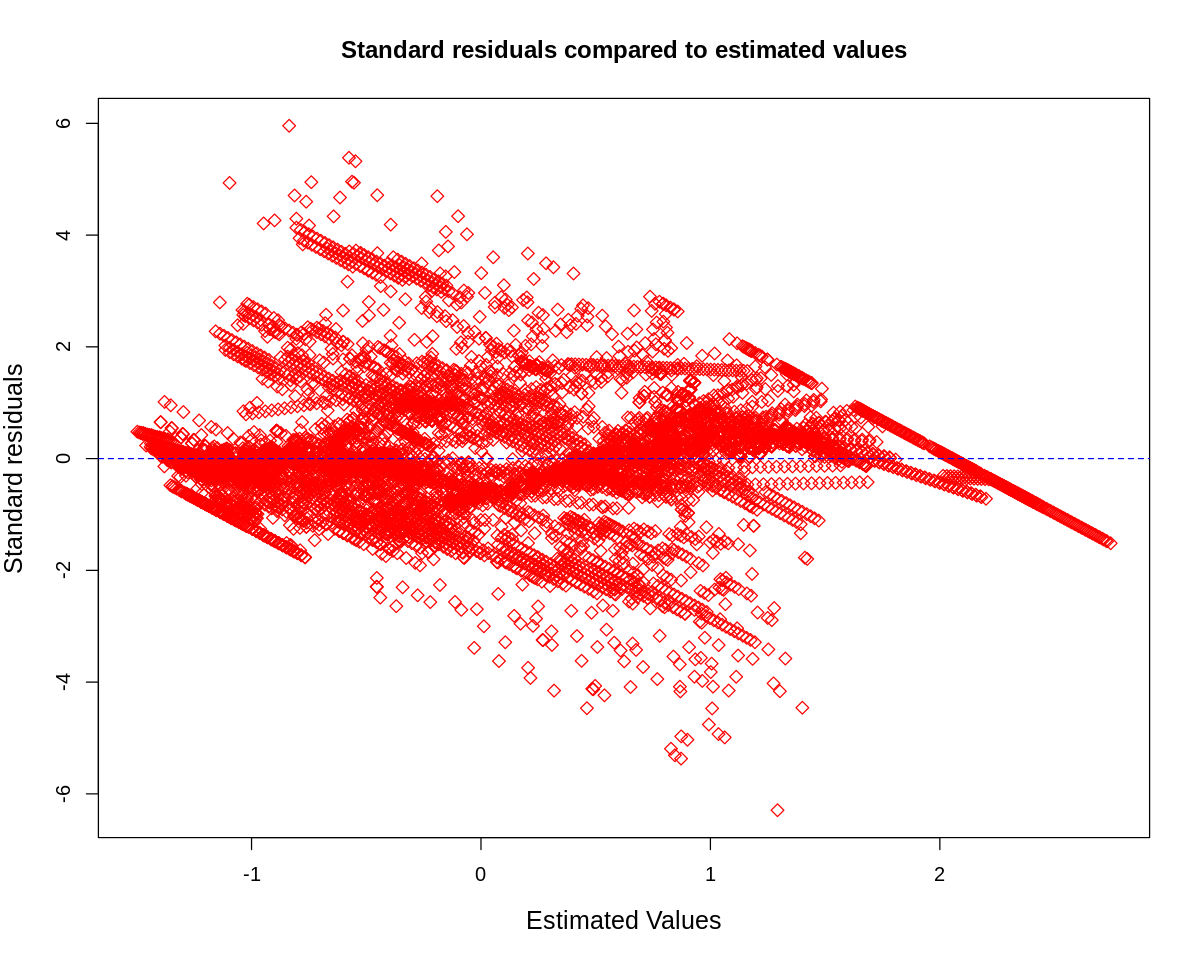

In [57]:
# Vector of estimated values
estimates <- fitted(model)

# Vector of residuals
residuals <- resid(model)

# Vector of standard residuals
standard_residuals <- residuals/sd(residuals)

# Standard residuals respect estimated values
plot(estimates, standard_residuals,
     main="Standard residuals compared to estimated values",
     xlab="Estimated Values", ylab="Standard residuals", pch=5, col="red",
     cex.lab = 1.25)
abline(h=0, col="blue", lty=2)

### LineOfCode ~ [all features - label]

In [59]:
model <- lm(LineOfCode ~ . - label, data = df_normalized)

# r.square
summary(model)


Call:
lm(formula = LineOfCode ~ . - label, data = df_normalized)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87171 -0.06449 -0.02074  0.04254  0.93314 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.088170   0.004093  21.544  < 2e-16 ***
URLLength              0.067865   0.002412  28.142  < 2e-16 ***
DomainLength           0.008939   0.002136   4.184 2.89e-05 ***
TLDEncoding            0.121184   0.002520  48.089  < 2e-16 ***
NoOfLettersInURL       0.103786   0.002989  34.721  < 2e-16 ***
NoOfDigitsInURL       -0.185544   0.006778 -27.373  < 2e-16 ***
NoOfSpecialCharsInURL  0.074592   0.006184  12.062  < 2e-16 ***
LargestLineLength      0.987001   0.002255 437.770  < 2e-16 ***
NoOfReference          0.023590   0.002260  10.438  < 2e-16 ***
DomainTitleMatchScore  0.018011   0.002371   7.597 3.31e-14 ***
URLTitleMatchScore    -0.018866   0.002642  -7.140 1.00e-12 ***
NoOfExternalFiles     -0.020240   0.002576  -7.

#### Standard residuals compared to estimated values

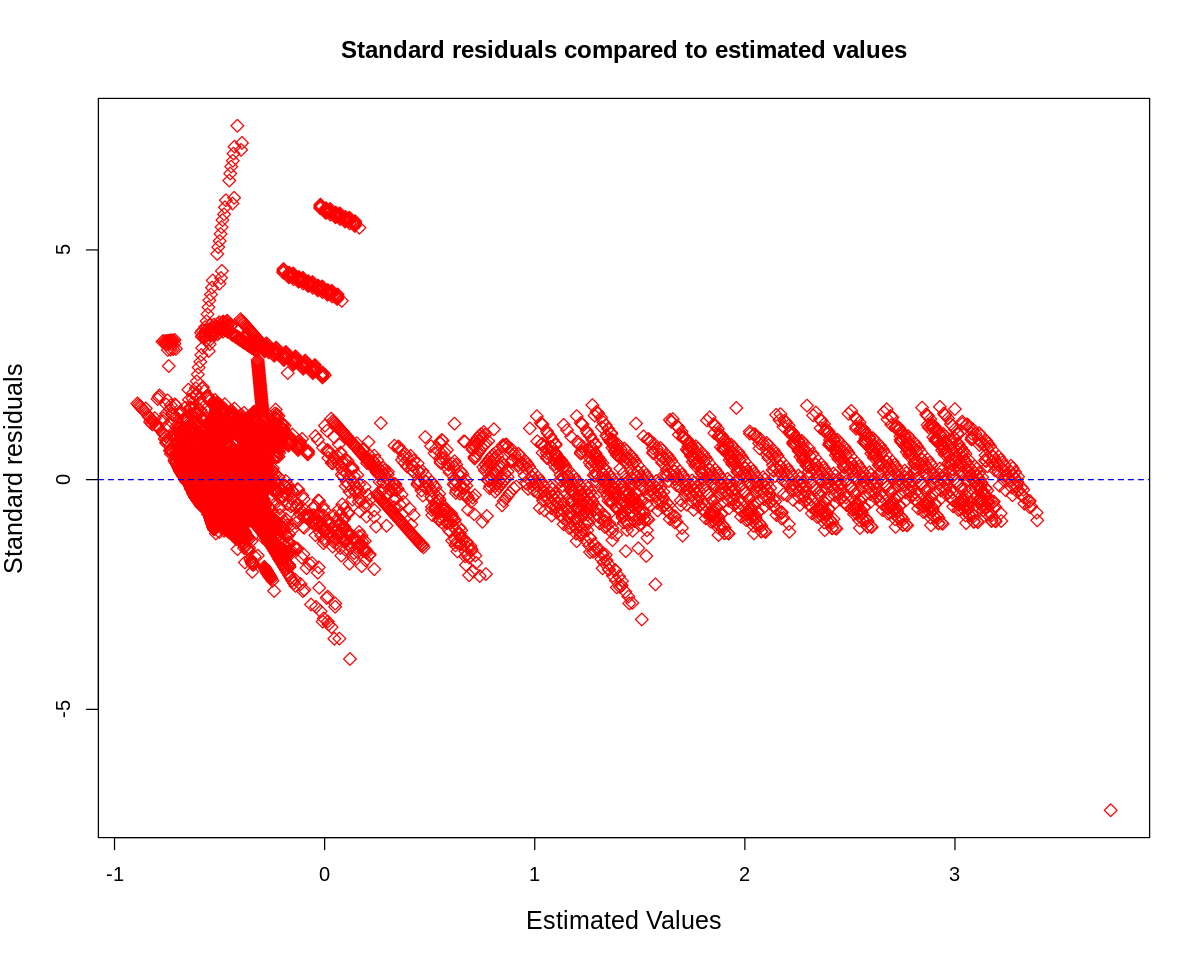

In [60]:
# Vector of estimated values
estimates <- fitted(model)

# Vector of residuals
residuals <- resid(model)

# Vector of standard residuals
standard_residuals <- residuals/sd(residuals)

# Standard residuals respect estimated values
plot(estimates, standard_residuals,
     main="Standard residuals compared to estimated values",
     xlab="Estimated Values", ylab="Standard residuals", pch=5, col="red",
     cex.lab = 1.25)
abline(h=0, col="blue", lty=2)

## **Log transforming**

The logarithmic transformation helps reduce the influence of outliers in the data. By applying the logarithm, larger values are "compressed" or scaled down, while smaller values remain relatively unchanged. This mitigates the effect of outliers, making the regression model more stable and less sensitive to extreme data points.

$$
 x' = \log(x)
$$

In [61]:
# Exclude binary features to the scaling
exclude_columns <- c(7, 10, 14, 15, 16, 18, 19, 20, 21)

df_log <- df[, -exclude_columns]

df_log[] <- lapply(df_log, function(x) {
   log(x + 0.001)
})

# Combined binary and continuous features
df_log <- cbind(df_log, df[, exclude_columns])

# Converting in data frame
df_log <- as.data.frame(df_log)

In [62]:
str(df_log)

'data.frame':	10124 obs. of  21 variables:
 $ URLLength            : num  3.81 4.09 3.33 4.32 4.5 ...
 $ DomainLength         : num  3.22 3.4 2.89 3.69 3.91 ...
 $ TLDEncoding          : num  -1.136 -1.604 -0.914 -2.293 -1.382 ...
 $ NoOfLettersInURL     : num  3.4 3.56 2.48 3.81 3.69 ...
 $ NoOfDigitsInURL      : num  1.387 1.61 0.694 2.303 1.792 ...
 $ NoOfSpecialCharsInURL: num  1.61 1.387 0.001 1.792 0.694 ...
 $ LineOfCode           : num  5.7 5.35 4.61 5.99 5.01 ...
 $ LargestLineLength    : num  7.6 7.5 7.31 8.01 7.82 ...
 $ NoOfReference        : num  1.61 0.694 2.08 -6.908 1.099 ...
 $ DomainTitleMatchScore: num  2.35 -6.91 2.71 -6.91 1.7 ...
 $ URLTitleMatchScore   : num  3.23 -6.91 3.09 -6.91 2.32 ...
 $ NoOfExternalFiles    : num  3 2.3 1.61 -6.91 2.48 ...
 $ IsHTTPS              : int  0 0 0 0 0 0 0 0 1 0 ...
 $ HasTitle             : int  0 0 1 0 1 0 0 0 0 0 ...
 $ HasFavicon           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Robots               : int  0 0 0 0 0 0 0 0 0 0 ...
 

## **Simple Linear Regression**

### LineOfCode ~ NoOfExternalFiles

In [63]:
model <- lm(df_log$LineOfCode ~ df_log$NoOfExternalFiles)

# r.square
summary(model)


Call:
lm(formula = df_log$LineOfCode ~ df_log$NoOfExternalFiles)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6548 -0.5457 -0.3225  0.4046  7.5865 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4.24689    0.03710  114.47   <2e-16 ***
df_log$NoOfExternalFiles  0.84570    0.01193   70.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.015 on 10122 degrees of freedom
Multiple R-squared:  0.3318,	Adjusted R-squared:  0.3317 
F-statistic:  5025 on 1 and 10122 DF,  p-value: < 2.2e-16


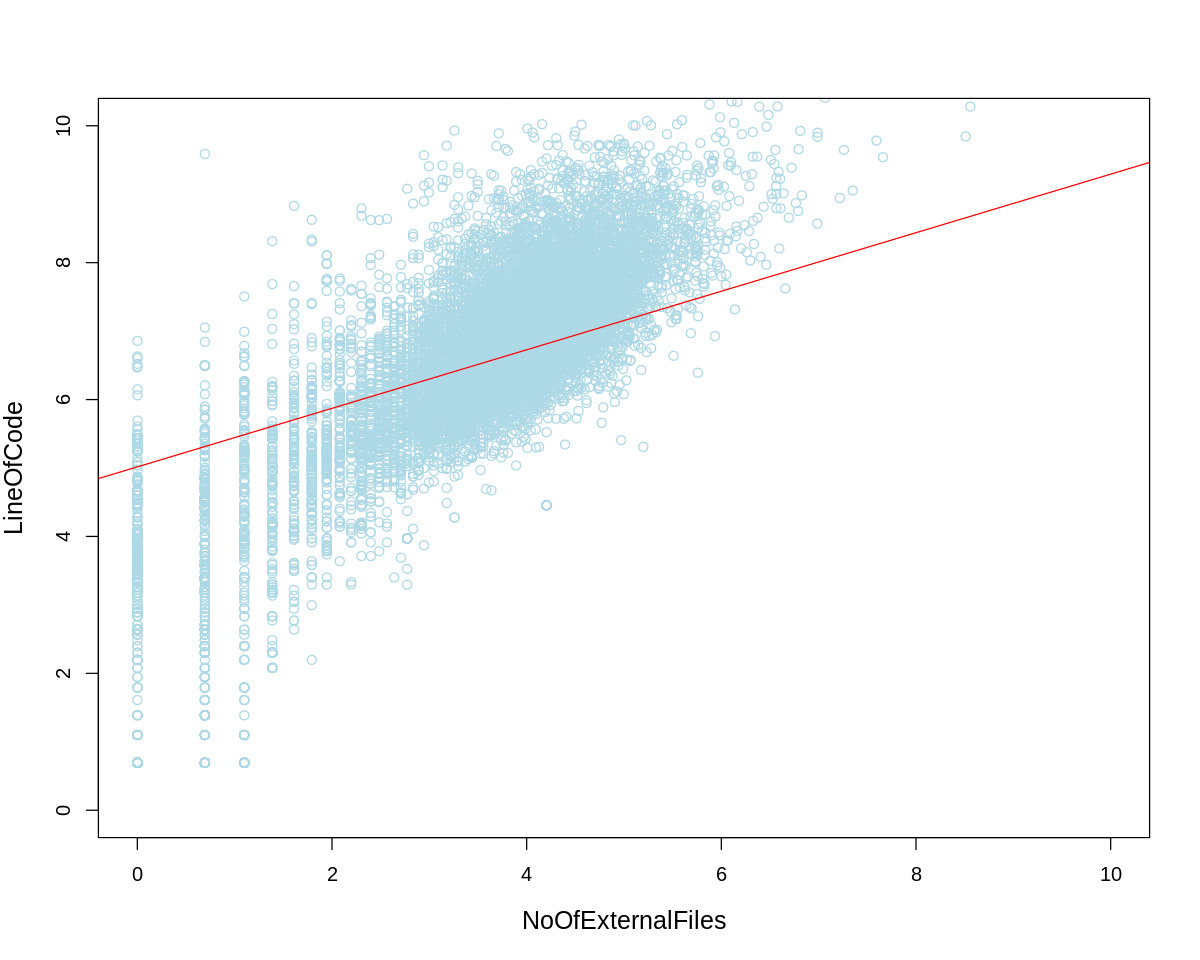

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(df_log$NoOfExternalFiles, df_log$LineOfCode,
     xlab = "NoOfExternalFiles", ylab = "LineOfCode",
     col = 'lightblue',
     xlim = c(0, 10), ylim = c(0, 10),
     cex.lab = 1.25)
abline(lm(df_log$LineOfCode ~ df_log$NoOfExternalFiles), col = "red")

### URLLength ~ NoOfDigitsInURL

In [65]:
model <- lm(df_log$URLLength ~ df_log$NoOfDigitsInURL)

# r.square
summary(model)


Call:
lm(formula = df_log$URLLength ~ df_log$NoOfDigitsInURL)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4674 -0.7189 -0.2096  0.4154  3.1241 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.393215   0.009513  461.82   <2e-16 ***
df_log$NoOfDigitsInURL 0.139873   0.003032   46.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9561 on 10122 degrees of freedom
Multiple R-squared:  0.1737,	Adjusted R-squared:  0.1737 
F-statistic:  2128 on 1 and 10122 DF,  p-value: < 2.2e-16


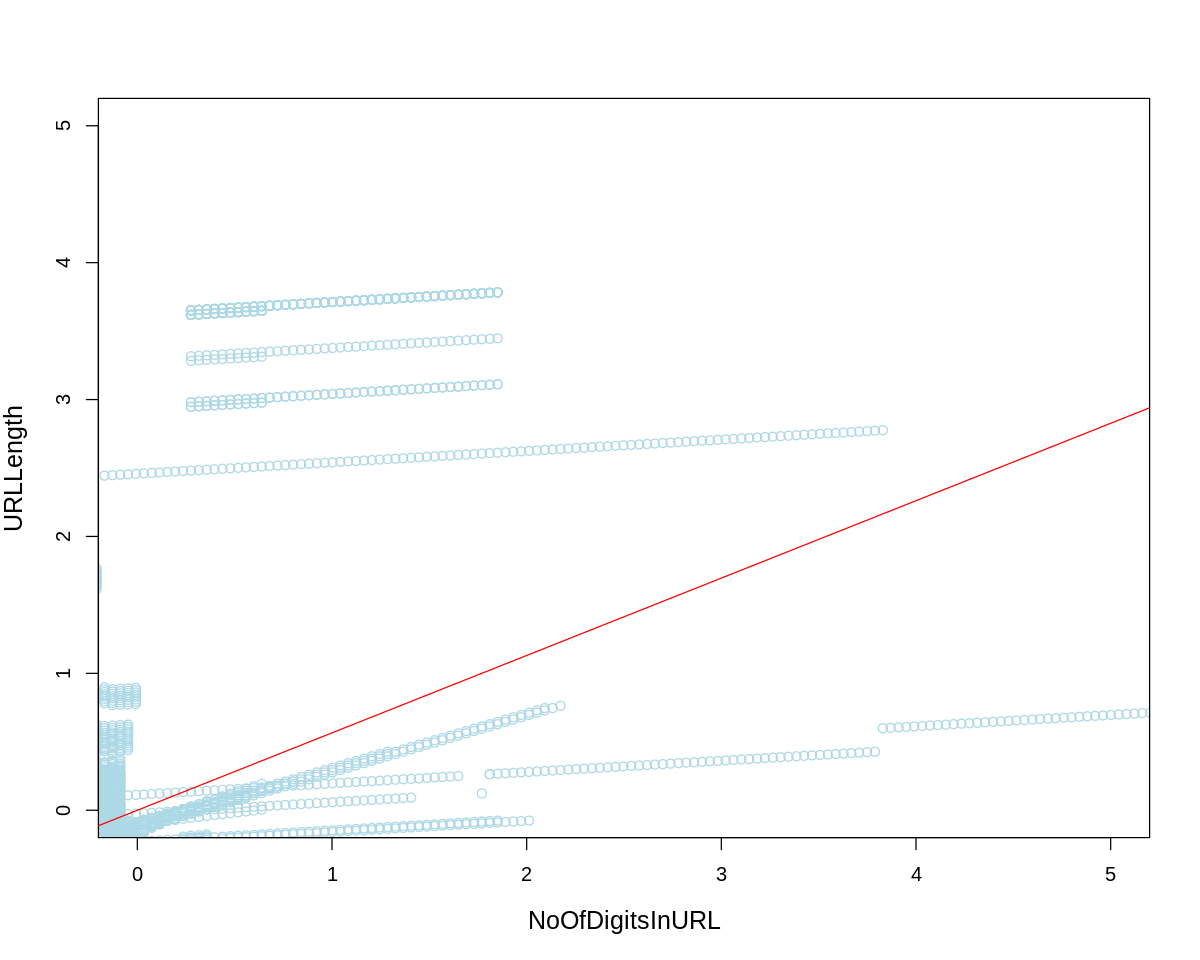

In [66]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot(df_normalized$NoOfDigitsInURL, df_normalized$URLLength,
     xlab = "NoOfDigitsInURL", ylab = "URLLength",
     col = 'lightblue',
     xlim = c(0, 5), ylim = c(0, 5),
     cex.lab = 1.25)
abline(lm(df_normalized$URLLength ~ df_normalized$NoOfDigitsInURL), col = "red")